# 4-1. Multivariable Linear regression

In [1]:
import torch
import torch.optim as optim

## Data

In [2]:
x_train=torch.FloatTensor([[73, 80, 75],
                           [93, 88, 93],
                           [89, 91, 90],
                           [96, 98, 100],
                           [73, 66, 70]])
y_train=torch.FloatTensor([[152],[185],[180],[196],[142]])

## Hypothesis Function
$H(x)=Wx+b$
- $x$라는 vector와 $W$라는 matrix의 곱


$H(x)=w_1x_1+w_2x_2+w_3x_3+b$
- 입력변수가 3개라면 weight도 3개

##  Hypothesis Function: Naive
$H(x)=w_1x_1+w_2x_2+w_3x_3+b$
- 단순한 hypothesis 정의
- 하지만 x가 길이 1000의 vector라면..?

In [ ]:
## H(x) 계산
hypothesis = x1_train * s1 + x2_train * w2 + x3_train * w3 + b

##  Hypothesis Function: Naive
$H(x)=Wx+b$
- `matmul()`로 한번에 계산
    - 더 간결하고
    - $x$의 길이가 바뀌어도 코드를 바꿀 필요가 없고
    - 속도도 더 빠르다

In [ ]:
##
hypothesis = x_train.matmul(W) + b # or .mm or @

## Cost function: MSE
기존 Simple Linear Regression과 동일한 공식
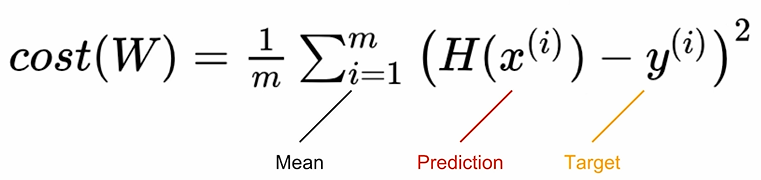

In [ ]:
cost = torch.mean((hypothesis - y_train) ** 2)

## Gradient Descent with `torch.optim`
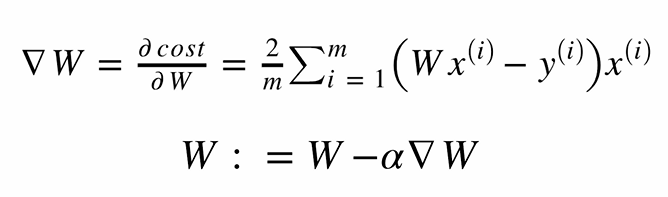

In [ ]:
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

# optimizer 사용법
optimizer.zero_grad()
cost.backward()
optimizer.step()

## Full Code with `torch.optim`
1. 데이터 정의
2. 모델 정의
3. optimizer 정의
4. Hypothesis 계산
5. Cost 계산(MSE)
6. Gradient descent

In [3]:
# 데이터
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  80], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

# 모델 초기화
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
                
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs=10
for epoch in range(nb_epochs+1):
    # H(x) 계산
    hypothesis=x_train.matmul(W)+b
    
    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
    ))

Epoch    0/10 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/10 hypothesis: tensor([66.7178, 80.1701, 76.1025, 86.0194, 61.1565]) Cost: 9537.694336
Epoch    2/10 hypothesis: tensor([104.5421, 125.6208, 119.2478, 134.7862,  95.8280]) Cost: 3069.590088
Epoch    3/10 hypothesis: tensor([125.9858, 151.3882, 143.7087, 162.4333, 115.4844]) Cost: 990.670898
Epoch    4/10 hypothesis: tensor([138.1429, 165.9963, 157.5768, 178.1071, 126.6283]) Cost: 322.482086
Epoch    5/10 hypothesis: tensor([145.0350, 174.2780, 165.4395, 186.9928, 132.9461]) Cost: 107.717064
Epoch    6/10 hypothesis: tensor([148.9423, 178.9730, 169.8976, 192.0301, 136.5279]) Cost: 38.687496
Epoch    7/10 hypothesis: tensor([151.1574, 181.6346, 172.4254, 194.8856, 138.5585]) Cost: 16.499043
Epoch    8/10 hypothesis: tensor([152.4131, 183.1435, 173.8590, 196.5043, 139.7097]) Cost: 9.365656
Epoch    9/10 hypothesis: tensor([153.1250, 183.9988, 174.6723, 197.4217, 140.3625]) Cost: 7.071114
Epoch   10/10 hyp

- 점점 작아지는 Cost
- 점점 y에 가까워지는 H(x)
- Learning rate에 따라 발산할 수도

## nn.Module
- nn.Module을 상속해서 모델 생성
- nn.Linear(3,1)
    - 입력 차원: 3
    - 출력 차원: 1
- hypothesis 계산은 forward() 에서
- Gradient 계산은 PyTorch가 알아서 해준다 backward()

In [ ]:
##
import torch.nn as nn

class MultivariateLinearRegressionModel(nn.Module):
    def __init(self):
        super().__init__()
        self.linear=nn.Linear(3,1)
        
    def forward(self, x):
        return self.linear(x)

hypothesis=model(x_train)

## F.mse_loss
- torch.nn.functional 에서 제공하는 loss function 사용
- 쉽게 다른 loss와 교체 가능(l1_loss, smooth_l1_loss 등)

In [ ]:
##
import torch.nn.functional as F

# cost 계산
cost = F.mse_loss(prediction, y_train)

## Full Code with `torch.optim`
1. 데이터 정의
2. 모델 정의
3. optimizer 정의
4. Hypothesis 계산
5. Cost 계산(MSE)
6. Gradient descent

In [5]:
import torch.nn as nn

class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(3,1)
        
    def forward(self, x):
        return self.linear(x)

In [6]:
import torch.nn.functional as F

In [7]:
# 데이터
x_train=torch.FloatTensor([[73, 80, 75],
                           [93, 88, 93],
                           [89, 91, 90],
                           [96, 98, 100],
                           [73, 66, 70]])
y_train=torch.FloatTensor([[152],[185],[180],[196],[142]])

# 모델 초기화
# W=torch.zeros((3,1), requires_grad=True)
# b=torch.zeros(1, requires_grad=True)
model=MultivariateLinearRegressionModel()

# optimizer 설정
#optimizer=optim.SGD([W,b], lr=1e-5)
optimizer = optim.SGD(model.parameters(), lr=1e-5)

nb_epochs=20
for epoch in range(nb_epochs+1):
    # H(x) 계산
    # hypothesis=x_train.matmul(W)+b
    Hypothesis=model(x_train)
    
    # cost 계산
    # cost = torch.mean((hypothesis - y_train) ** 2)
    cost=F.mse_loss(Hypothesis, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, Hypothesis.squeeze().detach(), cost.item()
    ))

Epoch    0/20 hypothesis: tensor([15.3398, 18.6705, 18.4360, 18.5091, 15.5231]) Cost: 23988.775391
Epoch    1/20 hypothesis: tensor([75.8257, 91.3705, 90.0684, 96.5149, 70.9750]) Cost: 7519.706055
Epoch    2/20 hypothesis: tensor([109.6894, 132.0727, 130.1727, 140.1875, 102.0206]) Cost: 2357.526855
Epoch    3/20 hypothesis: tensor([128.6483, 154.8604, 152.6255, 164.6382, 119.4020]) Cost: 739.457703
Epoch    4/20 hypothesis: tensor([139.2626, 167.6185, 165.1960, 178.3272, 129.1333]) Cost: 232.278809
Epoch    5/20 hypothesis: tensor([145.2051, 174.7614, 172.2338, 185.9912, 134.5815]) Cost: 73.304916
Epoch    6/20 hypothesis: tensor([148.5319, 178.7605, 176.1739, 190.2819, 137.6319]) Cost: 23.474865
Epoch    7/20 hypothesis: tensor([150.3943, 180.9995, 178.3798, 192.6841, 139.3398]) Cost: 7.855693
Epoch    8/20 hypothesis: tensor([151.4370, 182.2532, 179.6148, 194.0290, 140.2961]) Cost: 2.959667
Epoch    9/20 hypothesis: tensor([152.0206, 182.9551, 180.3061, 194.7820, 140.8316]) Cost: 1.4

# 4-2. Loading Data

## Data in the Real World
- 복잡한 머신러닝 모델을 학습하려면 엄청난 양의 데이터가 필요하다.
- 대부분 데이터셋은 적어도 수십만 개의 데이터를 제공한다.

## Data in the Real World: Problem
- 엄청난 양의 데이터를 한번에 학습시킬 수 없다.
    - 너무 느리다.
    - 하드웨어적으로 불가능하다.
- 그렇다면 일부분의 데이터로만 학습하면 어떨까?

## Minibatch Gradient Descent
전체 데이터를 균일하게 나눠서 학습하자
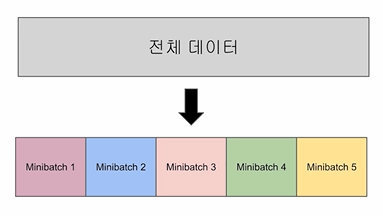

## Minibatch Gradient Descent: Effects
- 업데이트를 좀 더 빠르게 할 수 있다.
- 전체 데이터를 쓰지 않아서 잘못된 방향으로 업데이트를 할 수도 있다.
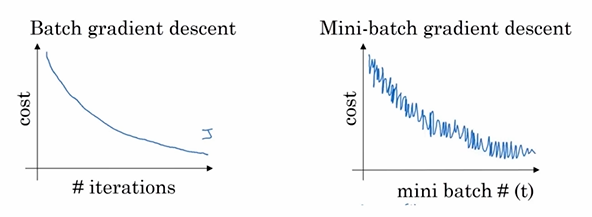

## PyTorch Dataset
- torch.utils.data.Dataset 상속
- `__len__()`: 데이터셋의 총 데이터 수
- `__getitem__()`: 어떠한 인덱스 idx를 받았을 때, 그에 상응하는 입출력 데이터 반환

In [8]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self):
        self.x_data=[[73,80,75],
                     [93,88,93],
                     [89,91,90],
                     [96,98,100],
                     [73,66,70]]
        self.y_data=[[152],[185],[180],[196],[142]]
        
    def __len__(self):
        return len(self.x_data)
    
    def __getitem__(self, idx):
        x=torch.FloatTensor(self.x_data[idx])
        y=torch.FloatTensor(self.y_data[idx])
        
        return x, y
    
dataset=CustomDataset()

## PyTorch DataLoader
- torch.utils.data.DataLoader 사용
- `batch_size=2`
    - 각 minibatch의 크기
    - 통상적으로 2의 제곱수로 설정한다. (16, 32, 64, 128, 256, 512 ...)
- `shuffle=True`
    - Epoch 마다 데이터셋을 섞어서, 데이터가 학습되는 순서를 바꾼다.

In [9]:
from torch.utils.data import DataLoader

dataloader=DataLoader(dataset, 
                      batch_size=2, 
                      shuffle=True)

## Full Code with Dataset and DataLoader
- enumerate(dataloader)
    - minibatch 인덱스와 데이터를 받음.
- len(dataloader)
    - 한 epoch당 minibatch 개수

In [10]:
nb_epochs=20
for epoch in range(nb_epochs+1):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train=samples
        # H(x) 계산
        prediction=model(x_train)

        # cost 계산
        cost=F.mse_loss(prediction, y_train)

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, batch_idx+1, len(dataloader), cost.item()
        ))

Epoch    0/20 Batch 1/3 Cost: 0.950646
Epoch    0/20 Batch 2/3 Cost: 0.934826
Epoch    0/20 Batch 3/3 Cost: 0.152409
Epoch    1/20 Batch 1/3 Cost: 1.371699
Epoch    1/20 Batch 2/3 Cost: 0.126199
Epoch    1/20 Batch 3/3 Cost: 0.834311
Epoch    2/20 Batch 1/3 Cost: 0.288332
Epoch    2/20 Batch 2/3 Cost: 1.098918
Epoch    2/20 Batch 3/3 Cost: 2.083771
Epoch    3/20 Batch 1/3 Cost: 0.550842
Epoch    3/20 Batch 2/3 Cost: 0.409327
Epoch    3/20 Batch 3/3 Cost: 2.274603
Epoch    4/20 Batch 1/3 Cost: 0.602283
Epoch    4/20 Batch 2/3 Cost: 0.597086
Epoch    4/20 Batch 3/3 Cost: 2.662390
Epoch    5/20 Batch 1/3 Cost: 1.400522
Epoch    5/20 Batch 2/3 Cost: 1.309490
Epoch    5/20 Batch 3/3 Cost: 0.407629
Epoch    6/20 Batch 1/3 Cost: 0.316422
Epoch    6/20 Batch 2/3 Cost: 0.917714
Epoch    6/20 Batch 3/3 Cost: 2.254763
Epoch    7/20 Batch 1/3 Cost: 0.570096
Epoch    7/20 Batch 2/3 Cost: 1.360081
Epoch    7/20 Batch 3/3 Cost: 0.515988
Epoch    8/20 Batch 1/3 Cost: 0.307444
Epoch    8/20 Batch 2/3 C